# Build Average Face

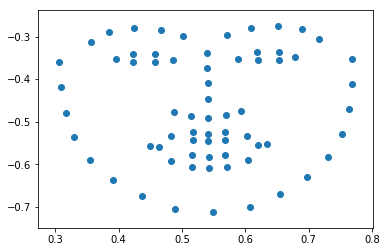

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

faces_path = "300w/"
image_files = []
pts_files = []
for file in os.listdir(faces_path):
    if file.endswith(".png"):
        image_files.append(file)
#         print(file)
    elif file.endswith(".pts"):
        pts_files.append(file)

image_files.sort()
pts_files.sort()


# Get Landmark X and Y Points
landmark_x = []
landmark_y = []
for pts in pts_files:
    pts_path = faces_path + pts
    with open(pts_path) as pts_file:
        data = pts_file.readlines()[3:68+3]
        data = [np.array(line.split(), dtype=float) for line in data]
        landmarks = np.array(data)

        x_points = landmarks[:,0]
        y_points = landmarks[:,1]
        
        landmark_x.append(x_points)
        landmark_y.append(y_points)

landmark_x = np.array(landmark_x)
landmark_y = np.array(landmark_y)


# Get image dimensions for normalization
im_rows = []
im_cols = []
for image in image_files:
    im = cv2.imread(faces_path + image)
    im_rows.append(im.shape[0])
    im_cols.append(im.shape[1])

im_rows = np.array(im_rows)
im_cols = np.array(im_cols)

# Normalize by dividing by image height and width
for i in range(600):
    landmark_x[i] /= im_rows[i]
    landmark_y[i] /= im_cols[i]
    
# Compute average face
average_x = np.mean(landmark_x, axis=0)
average_y = np.mean(landmark_y, axis=0)

plt.figure(0)
plt.scatter(average_x, -1 * average_y)
plt.show()

# Compute Facial Models

In [7]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

artist_path = "AF_dataset/Amedeo_Modigliani/"
image_files = []
json_files = []
for file in os.listdir(artist_path):
    if file.endswith(".png"):
        image_files.append(file)
    elif file.endswith(".ljson"):
        json_files.append(file)
        
image_files.sort()
json_files.sort()
assert(len(image_files) == len(json_files))
n = len(image_files)
n_landmarks = 68

print(image_files)
print(json_files)
print(n)

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
['0.ljson', '1.ljson', '2.ljson', '3.ljson', '4.ljson', '5.ljson', '6.ljson', '7.ljson', '8.ljson', '9.ljson']
10


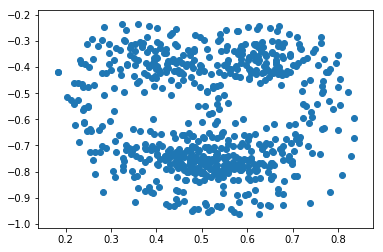

In [10]:
# Build data matrices for x and y landmark points
x_data = np.zeros((n,n_landmarks))
y_data = np.zeros((n, n_landmarks))
i = 0
for json_name in json_files:
    with open(artist_path + json_name) as json_file:
        landmarks = json.load(json_file)
    points = np.array(landmarks["landmarks"]["points"]) # 68 x 2 np array
    x_data[i] = points[:,1]
    y_data[i] = points[:,0]
    i += 1
# print(x_data.shape)
# print(y_data.shape)

# Get image dimensions for normalization
im_rows = []
im_cols = []
for image in image_files:
    im = cv2.imread(artist_path + image)
    im_rows.append(im.shape[0])
    im_cols.append(im.shape[1])
    
# normalize
for i in range(n):
    x_data[i] /= im_rows[i]
    y_data[i] /= im_cols[i]
    
plt.figure(1)
plt.scatter(x_data, -1 * y_data)
plt.show()

In [13]:
# compute difference vectors
x_diff = x_data - average_x
y_diff = y_data - average_y

# compute statistics


(10, 68)
(10, 68)
